In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

# This is a notebook "magic" command to make plots appear inline
%matplotlib inline

# Set a style for plots
plt.style.use('ggplot')

print("Libraries imported.")

Libraries imported.


In [11]:
# Define file paths
PRICES_PATH = '../data/cleaned_prices.csv'
FEATURES_PATH = '../data/node_features.csv'
GRAPH_PATH = '../data/dynamic_graph.pkl'

# Load the data
prices = pd.read_csv(PRICES_PATH, index_col=0, parse_dates=True)
features = pd.read_csv(FEATURES_PATH, index_col=0, parse_dates=True)

# Load the dynamic graph (which is a dictionary)
with open(GRAPH_PATH, 'rb') as f:
    dynamic_graph = pickle.load(f)

print(f"Loaded {len(prices)} rows of price data.")
print(f"Loaded {len(features)} rows of feature data.")
print(f"Loaded {len(dynamic_graph)} daily graph matrices.")

Loaded 5436 rows of price data.
Loaded 5375 rows of feature data.
Loaded 1242 daily graph matrices.


In [10]:
# Cell 3: Inspect Features (The "Nodes")

# Display the first 5 rows to see what the data looks like
print("--- Features Head ---")
print(features.head())

print("\n") # Add a space

# Get info on the data types and non-null counts
# This confirms all data is aligned and there are no missing values.
print("--- Features Info ---")
features.info()

--- Features Head ---
            BRL=X_return  CL=F_return  DX-Y.NYB_return  KC=F_return  \
Date                                                                  
2005-02-14           0.0     0.005920        -0.007239    -0.009298   
2005-02-15           0.0    -0.003801        -0.004417     0.046924   
2005-02-16           0.0     0.022388         0.000957    -0.008097   
2005-02-17           0.0    -0.016481        -0.002393     0.001710   
2005-02-18           0.0     0.016895         0.000240     0.008507   

            ZIM_return  ^TNX_return  BRL=X_vol  CL=F_vol  DX-Y.NYB_vol  \
Date                                                                     
2005-02-14         0.0    -0.005387        0.0  0.321652      0.089764   
2005-02-15         0.0     0.006119        0.0  0.301771      0.079974   
2005-02-16         0.0     0.014535        0.0  0.303951      0.079955   
2005-02-17         0.0     0.006473        0.0  0.277299      0.077593   
2005-02-18         0.0     0.017763 

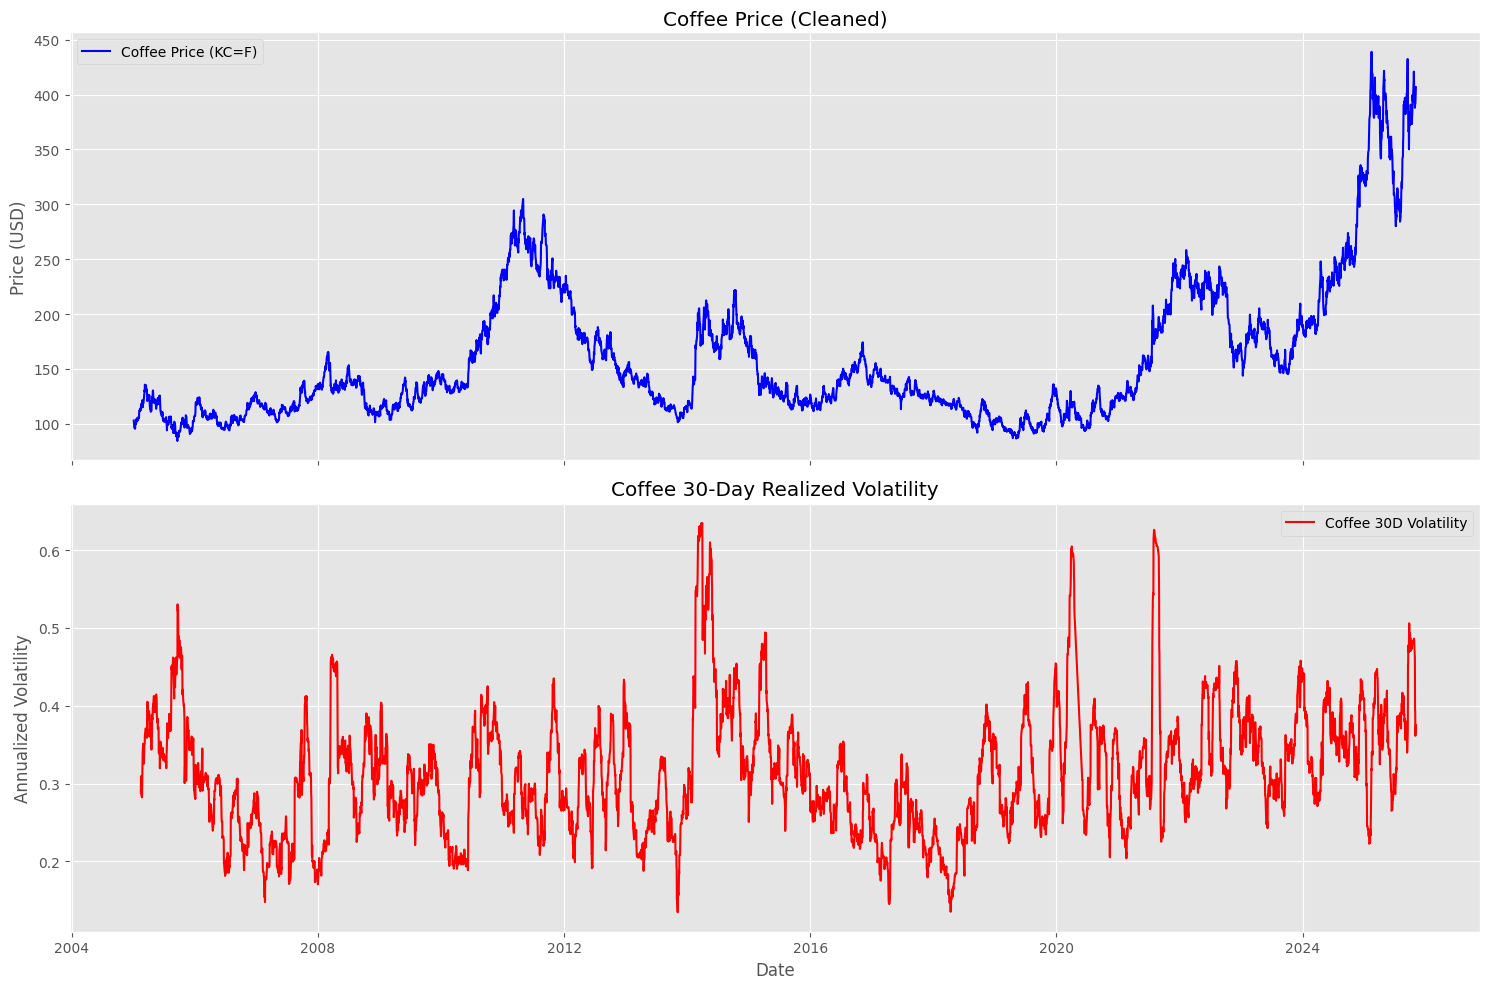

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot 1: Coffee Price
ax1.plot(prices.index, prices['KC=F'], label='Coffee Price (KC=F)', color='blue')
ax1.set_title('Coffee Price (Cleaned)')
ax1.set_ylabel('Price (USD)')
ax1.legend()
ax1.grid(True)

# Plot 2: Coffee Volatility
ax2.plot(features.index, features['KC=F_vol'], label='Coffee 30D Volatility', color='red')
ax2.set_title('Coffee 30-Day Realized Volatility')
ax2.set_ylabel('Annualized Volatility')
ax2.legend()
ax2.grid(True)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

Asset list: ['BRL=X', 'CL=F', 'DX-Y.NYB', 'KC=F', 'ZIM', '^TNX']
Coffee index: 3, Oil index: 1
Found 1242 matching dates for graph and features.


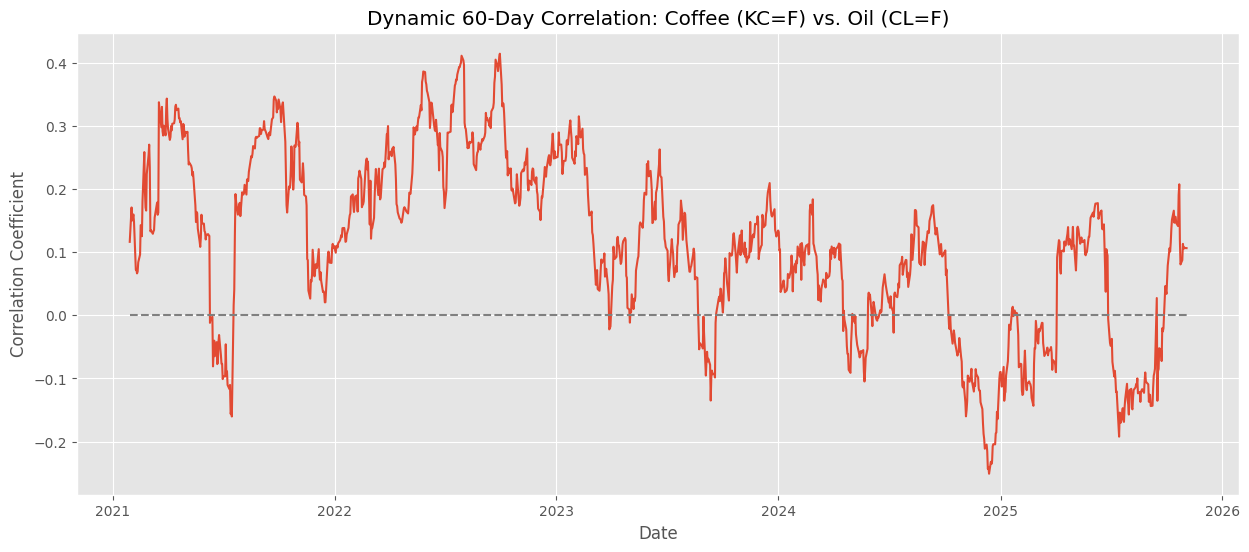

In [6]:
# Get the asset names from your price data
assets = prices.columns

# Find the integer index for Coffee and Oil
idx_coffee = assets.get_loc('KC=F')
idx_oil = assets.get_loc('CL=F')

print(f"Asset list: {list(assets)}")
print(f"Coffee index: {idx_coffee}, Oil index: {idx_oil}")

# Extract the rolling correlation time-series
# Note: We must align the graph dates with the feature dates
aligned_dates = features.index.intersection(dynamic_graph.keys())
print(f"Found {len(aligned_dates)} matching dates for graph and features.")

# Create a list of the correlation values over time
rolling_corr = [dynamic_graph[date][idx_coffee, idx_oil] for date in aligned_dates]

# Create a pandas Series for easy plotting
corr_series = pd.Series(rolling_corr, index=aligned_dates)

# Plot the dynamic correlation
plt.figure(figsize=(15, 6))
plt.plot(corr_series)
plt.title('Dynamic 60-Day Correlation: Coffee (KC=F) vs. Oil (CL=F)')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Date')
plt.hlines(0, corr_series.index.min(), corr_series.index.max(), linestyles='dashed', colors='gray', label='Zero Correlation')
plt.show()